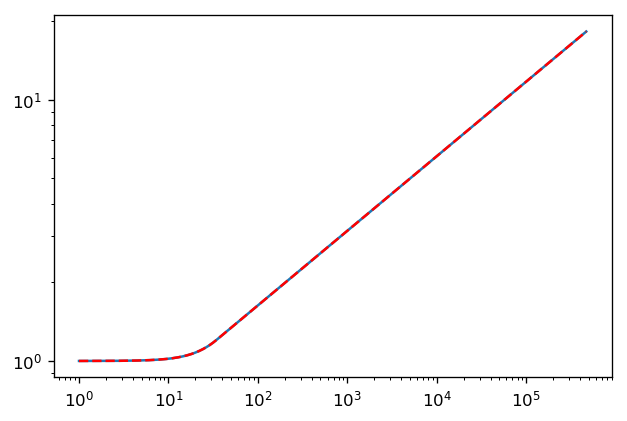

In [9]:
%run main.py

In [15]:
print(L[-1])
print(test.L[-1])

0.0016236692588633853
0.001158540076597718


In [12]:
delta=T-test.T

In [14]:
delta

array([0.00000000e+00, 3.99680289e-15, 1.55431223e-14, 3.46389584e-14,
       6.17284002e-14, 9.63673585e-14, 1.38777878e-13, 1.89182003e-13,
       2.47801779e-13, 3.14193116e-13, 3.89022148e-13, 4.72066830e-13,
       5.63105118e-13, 6.62803146e-13, 7.70716824e-13, 8.87290241e-13,
       1.01207931e-12, 1.14552812e-12, 1.28808075e-12, 1.43907108e-12,
       1.59872116e-12, 1.76791914e-12, 1.94555483e-12, 2.13229434e-12,
       2.32835973e-12, 2.53352894e-12, 2.74802403e-12, 2.97162295e-12,
       3.20499183e-12, 3.44746454e-12, 3.69970721e-12, 3.96171984e-12,
       4.23350244e-12, 4.51527704e-12, 4.80659956e-12, 5.10769205e-12,
       5.41944267e-12, 5.74096326e-12, 6.07314199e-12, 6.41509068e-12,
       6.76791956e-12, 7.13118453e-12, 7.50488560e-12, 7.88946686e-12,
       8.28470625e-12, 8.69082584e-12, 9.10782560e-12, 9.53592760e-12,
       9.97535388e-12, 1.04258824e-11, 1.08877352e-11, 1.13609122e-11,
       1.18458576e-11, 1.23423494e-11, 1.28501654e-11, 1.33704159e-11,
      

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from numba import jit
from calculator import Methods,Calculator
from scipy.optimize import leastsq

In [3]:
cal=Calculator()
cal.read_excel('Data.xlsx')
order=1
m=cal.M_p[order]
cal.me.con.set_M_p(m)
ST_max=cal.ST[order]
L_s=cal.L_init[order]
ST_test=np.linspace(0,ST_max,100)
dG_test=np.linspace(3.3476e-9,3.3480e-9,100)
g_in=np.ones(len(dG_test))
for i in range(len(dG_test)):
        g_in[i]=cal.me.cal_ML_simple_B(ST_max*9/10,L_s,True,1e-9,dG_test[i])[2]

In [9]:
def creat_plot_2D(x,y,ref,plot_style='r--',plot_style_ref='g--',save=False,scatter=False):
    plt.figure(dpi=100)
    plt.plot(x,y,plot_style)
    plt.plot(x,np.ones(y.shape)*ref,plot_style_ref)
    if scatter:
        plt.scatter(scatter[0],scatter[1],marker='o')
    if save:
        if type(save) is str:
            plt.savefig(save)
        else:
            plt.savefig('result.png')
    else:
        plt.show()

In [11]:
def func(p,x):
    k,b=p
    return k*x+b
def error(p,x,y):
    return func(p,x)-y
def test(k,b,x):
    return k*x+b
p0=[-1.5e+16,6e+16]
Para=leastsq(error,p0,args=(dG_test,g_in))
k,b=Para[0]

In [13]:
x=-b/k
print('y={0}'.format(cal.me.cal_ML_simple_B(ST_max*9/10,L_s,True,1e-9,x)[2]))

y=-2764911.9188675922


In [14]:
x

3.3476574910547576e-09